# Урок 3. TensorFlow
# Домашнее задание

### <span class="burk">Задание 1.</span>
**Имеются два массива с рукописными буквами и с характеристиками вина. Нужно выбрать датасет, возможно, предварительно обработать, создать модель, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.
При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.**

## Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [39]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [40]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [41]:
def seed_random(seed=123):
  # The below is necessary for starting Numpy generated random numbers
  # in a well-defined initial state.
  np.random.seed(123)

  # The below is necessary for starting core Python generated random numbers
  # in a well-defined state.
  python_random.seed(123)

  # The below set_seed() will make random number generation
  # in the TensorFlow backend have a well-defined initial state.
  # For further details, see:
  # https://www.tensorflow.org/api_docs/python/tf/random/set_seed
  tf.random.set_seed(1234)

In [42]:
data = load_wine()

In [43]:
X = data['data']
y = data['target']

In [44]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [45]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [46]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [47]:
X.shape, y.shape

((178, 13), (178,))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 13), (59, 13), (119,), (59,))

In [50]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(3),
])

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [59]:
h = model.fit(X_train, y_train, epochs=9, verbose=2)

Epoch 1/9
4/4 - 0s - loss: 0.7794 - accuracy: 0.7563 - 491ms/epoch - 123ms/step
Epoch 2/9
4/4 - 0s - loss: 0.1887 - accuracy: 0.9748 - 37ms/epoch - 9ms/step
Epoch 3/9
4/4 - 0s - loss: 0.0516 - accuracy: 0.9916 - 42ms/epoch - 11ms/step
Epoch 4/9
4/4 - 0s - loss: 0.0170 - accuracy: 1.0000 - 38ms/epoch - 10ms/step
Epoch 5/9
4/4 - 0s - loss: 0.0042 - accuracy: 1.0000 - 42ms/epoch - 11ms/step
Epoch 6/9
4/4 - 0s - loss: 0.0024 - accuracy: 1.0000 - 44ms/epoch - 11ms/step
Epoch 7/9
4/4 - 0s - loss: 8.9752e-04 - accuracy: 1.0000 - 35ms/epoch - 9ms/step
Epoch 8/9
4/4 - 0s - loss: 5.8700e-04 - accuracy: 1.0000 - 35ms/epoch - 9ms/step
Epoch 9/9
4/4 - 0s - loss: 3.3310e-04 - accuracy: 1.0000 - 40ms/epoch - 10ms/step


In [61]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(X_test)

In [62]:
print(classification_report(y_test, predictions.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.96      0.98        24
           2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, multilabel_confusion_matrix

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)
print("Sci-Kit Learn version: ", sklearn.__version__)

TensorFlow version:  2.8.2
Keras version:  2.8.0
Matplotlib version:  3.2.2
Numpy version:  1.21.6
Sci-Kit Learn version:  1.0.2


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

# X = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_images.npy')
# y = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
X = np.load('13_3_binary_alpha_digits_images.npy')
Y = np.load('13_3_binary_alpha_digits_labels.npy')

In [ ]:
X.shape, y.shape

((1404, 20, 16), (1404,))

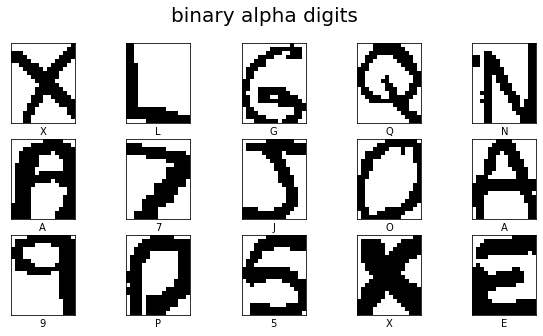

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y,
                                                      shuffle=True,
                                                      test_size=0.2,
                                                      random_state=21,
                                                      stratify=y
                                                      )

In [ ]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(1123, 20, 16)
1123
[ 2 14  1 ...  7  2  2]


In [ ]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')

(281, 20, 16)
281
[23 20 11 33  9  1  3 25 24 23 18 24 32 19 14 28 16  9 35  5 14 20  1 26
 17  1 16 20 34 22 25 11 31 12 34  3  8 28  6 13  8 29 21 27 15 23  6  9
 11  2 34 18 33 32 31  5 17 12 16 31 20 30 12 35 26  0 24 32  9  4 21 35
 20 21 10 22 27 30 20 32 15 15 17 13 23 28  9 17 27  7 32 29  0 25  0 17
 29  5 34 25 30 29 18 13  2  3 25  2 14 15  8 17  7 18 10 29 18 11 35 27
  4 30 26  4 33 30 15 19 22 19  3 23 25 12  7  2 26 16 21 19  4  3 24 31
 29  2 35 33 22  8 11 24 19 16 28  6  8  5  0 13  4 28 26 26 14 20 18 33
 11 27  9  5 10 10 12  2 30  3  1 31 15  8 28 16  0 19 12  8 32  6 29 24
 11  6 21  2 19 34 20  4  4 17 12 24 17 11 31 13  5 35 34 25  5 22 31 14
 22 29 10 18  7  7 25 34 14 13 15  6 30 27  2 28 14  1 24 33 15  3 12 16
  1 22 14 35 33 26 21  4 10  8  7 30 10  6 21 33  0 16 13 35 19 10  5 26
  0 23 22  9 34 28  1  9 21  0 27  6 23 31  7 32 27]


## Обучение

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hstr = model.fit(train_images, train_labels, epochs=13, verbose=1)

Epoch 1/13
36/36 [==============================] - 1s 13ms/step - loss: 1.9835 - accuracy: 0.4550
Epoch 2/13
36/36 [==============================] - 0s 13ms/step - loss: 0.9280 - accuracy: 0.7142
Epoch 3/13
36/36 [==============================] - 1s 14ms/step - loss: 0.6872 - accuracy: 0.7801
Epoch 4/13
36/36 [==============================] - 0s 13ms/step - loss: 0.5267 - accuracy: 0.8406
Epoch 5/13
36/36 [==============================] - 0s 13ms/step - loss: 0.2838 - accuracy: 0.9225
Epoch 6/13
36/36 [==============================] - 0s 13ms/step - loss: 0.2375 - accuracy: 0.9261
Epoch 7/13
36/36 [==============================] - 1s 14ms/step - loss: 0.1291 - accuracy: 0.9581
Epoch 8/13
36/36 [==============================] - 0s 13ms/step - loss: 0.1221 - accuracy: 0.9492
Epoch 9/13
36/36 [==============================] - 1s 14ms/step - loss: 0.0791 - accuracy: 0.9671
Epoch 10/13
36/36 [==============================] - 0s 12ms/step - loss: 0.0692 - accuracy: 0.9777
Epoch 11/

In [ ]:
hstr.history

{'accuracy': [0.455031156539917,
  0.7141584753990173,
  0.780053436756134,
  0.8406054973602295,
  0.9225289225578308,
  0.9260908365249634,
  0.9581478238105774,
  0.9492431282997131,
  0.9670525193214417,
  0.9777382016181946,
  0.9652715921401978,
  0.974176287651062,
  0.9706144332885742],
 'loss': [1.9835121631622314,
  0.9279754757881165,
  0.6871654987335205,
  0.5266770124435425,
  0.28383198380470276,
  0.23750659823417664,
  0.12905095517635345,
  0.12206165492534637,
  0.0791059210896492,
  0.06919395923614502,
  0.07947593182325363,
  0.05552491918206215,
  0.05837201699614525]}

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 320)               0         
                                                                 
 dense_39 (Dense)            (None, 512)               164352    
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 512)               262656    
                                                                 
 dense_43 (Dense)            (None, 36)                18468     
                                                                 
Total params: 970,788
Trainable params: 970,788
Non-t

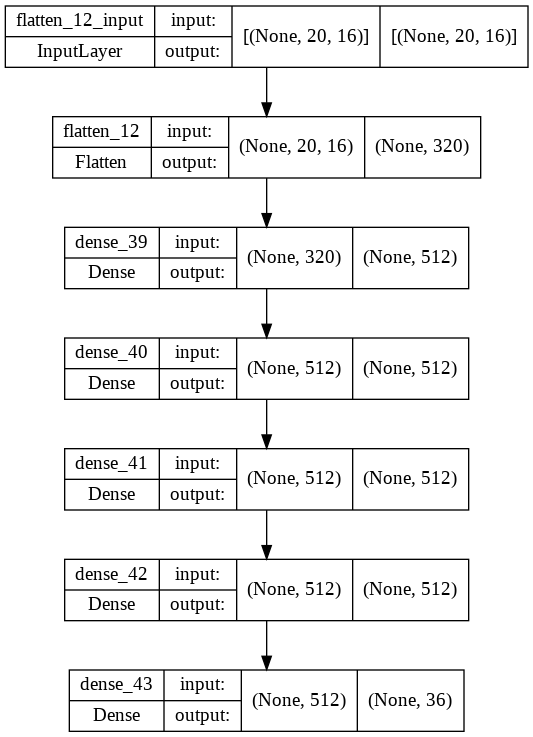

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.predict(test_images)

array([[-3.4046378e+00, -1.3104746e+00, -2.7819281e+00, ...,
         2.0114949e+00,  1.5134329e+00, -1.6232747e+00],
       [-8.9792137e+00,  9.9153146e-02, -5.6144209e+00, ...,
         4.8919439e+00,  6.4678612e+00,  5.0391686e-01],
       [-9.5556408e-01,  4.5315466e+00, -4.0285797e+00, ...,
         1.0114318e+00, -2.3664412e+00,  1.8173397e-01],
       ...,
       [ 1.2238834e+00, -1.1247933e+00,  2.2945895e+00, ...,
        -1.8202375e+00,  3.3222976e+00,  3.3971860e+00],
       [ 4.8280649e+00,  8.9894795e-01,  1.4379878e+00, ...,
        -4.6233506e+00, -1.0583694e+01,  7.9369275e-03],
       [-3.9731622e+00,  2.7237792e+00, -4.3751569e+00, ...,
         2.8208776e+00,  6.8903375e-01, -1.7390740e-01]], dtype=float32)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[1.52527804e-07 1.23831865e-06 2.84307418e-07 2.57820502e-05
 4.41117772e-05 4.21301607e-08 7.14569842e-06 4.52472619e-07
 2.48650963e-06 1.46773564e-05 1.70152052e-03 5.78145432e-07
 1.00174082e-08 6.32130614e-05 2.71723565e-07 1.93613076e-07
 8.10857784e-07 5.09482517e-04 7.19391764e-08 2.22846741e-10
 2.33394923e-04 4.25573853e-05 6.58225501e-04 9.50646162e-01
 3.86464137e-07 3.21052576e-05 1.13760405e-04 3.44440414e-05
 7.52290035e-08 1.94376049e-09 8.15511667e-05 3.03250727e-05
 4.56983373e-02 3.43198408e-05 2.08564106e-05 9.05701086e-07]
23
23


In [ ]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 5ms/step - loss: 1.0120 - accuracy: 0.7046
Test loss: 1.0120494365692139
Test accuracy: 0.7046263217926025


__*Комментарии преподавателя:*__<br>
*Милена Сокол・Преподаватель<br>*

Здравствуйте!

Хорошая работа, получилось отличное качество